<a href="https://colab.research.google.com/github/redsIng/ML_WineProject/blob/main/ml_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
from google.colab import drive
drive.mount('/content/gdrive')

import warnings
warnings.filterwarnings('ignore')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [55]:
%cd /content/gdrive/MyDrive/ML_whisky
!ls

/content/gdrive/MyDrive/ML_whisky
ml_wine.ipynb  pd_functions.py	__pycache__  README.md	winequality-red.csv


In [56]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm

plt.style.use('ggplot')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['xkcd:pale orange', 
          'xkcd:sea blue', 
          'xkcd:pale red', 
          'xkcd:sage green', 
          'xkcd:terra cotta', 
          'xkcd:dull purple', 
          'xkcd:teal', 
          'xkcd:goldenrod', 
          'xkcd:cadet blue', 
          'xkcd:scarlet']

bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)

### Separazione X e Y (la quality è il target)

In [57]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np


dataset = ['winequality-red.csv']
df = pd.read_csv(dataset[0])

In [60]:
column_names = list(df.columns.values)
column_names


['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

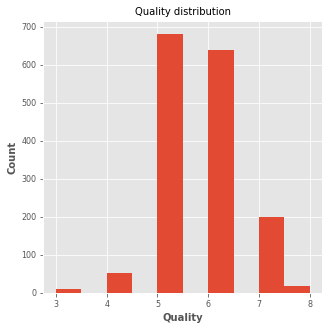

In [61]:
X = df.iloc[:, :-1]
Y = df['quality']

fig = plt.figure(figsize = (5, 5))
plt.hist(df.quality)
plt.xlabel('Quality', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.title('Quality distribution')
plt.show() 
  
X = np.array(X)
Y = np.array(Y)


In [62]:
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [63]:
Y

array([5, 5, 5, ..., 6, 5, 6])

# Preprocessing

## Missing Values

In [65]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Check Zeroes Data 

In [66]:
df[df == 0].count()

fixed acidity             0
volatile acidity          0
citric acid             132
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64

## Normalizzazione dati

In [67]:
#df=(df-df.min())/(df.max()-df.min())
#normalized_df=(df-df.mean())/df.std()

from sklearn.preprocessing import StandardScaler
import pandas as pd

df = StandardScaler().fit_transform(df)
df = pd.DataFrame(df, columns = column_names)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,-0.787823
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,0.450848
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,0.450848
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,-0.787823


## Indici di Varianza, Asimmetria, Curtosi (appiattimento)

In [75]:
df.mean()

fixed acidity           3.554936e-16
volatile acidity        1.733031e-16
citric acid            -8.887339e-17
residual sugar         -1.244227e-16
chlorides               2.132961e-16
free sulfur dioxide    -6.221137e-17
total sulfur dioxide    4.443669e-17
density                -3.473172e-14
pH                      2.861723e-15
sulphates               6.754377e-16
alcohol                 1.066481e-16
quality                 8.887339e-17
dtype: float64

In [68]:
df.var()

fixed acidity           1.000626
volatile acidity        1.000626
citric acid             1.000626
residual sugar          1.000626
chlorides               1.000626
free sulfur dioxide     1.000626
total sulfur dioxide    1.000626
density                 1.000626
pH                      1.000626
sulphates               1.000626
alcohol                 1.000626
quality                 1.000626
dtype: float64

In [71]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [70]:
df.kurtosis()

fixed acidity            1.132143
volatile acidity         1.225542
citric acid             -0.788998
residual sugar          28.617595
chlorides               41.715787
free sulfur dioxide      2.023562
total sulfur dioxide     3.809824
density                  0.934079
pH                       0.806943
sulphates               11.720251
alcohol                  0.200029
quality                  0.296708
dtype: float64

## Istogrammi

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24b5b9f850>,
      dtype=object)

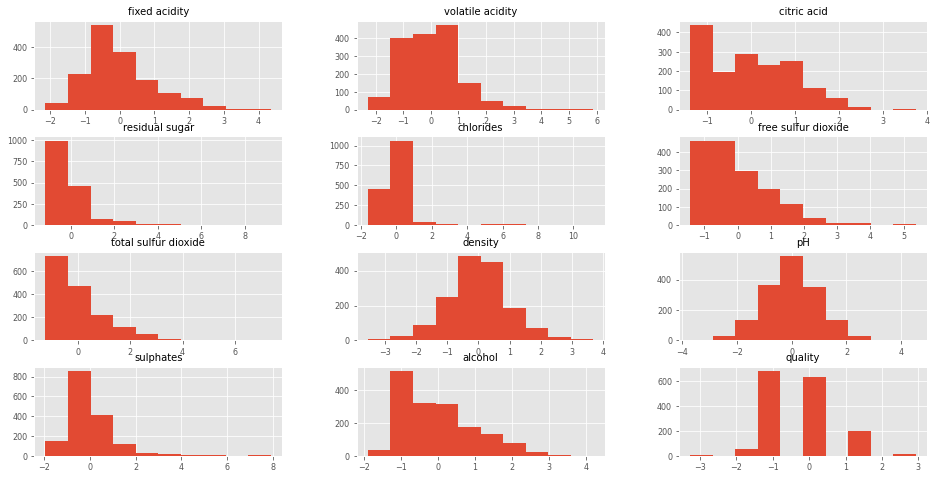

In [72]:
df.hist()

## Check Outliers

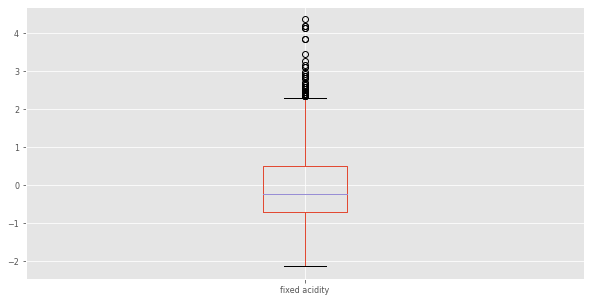

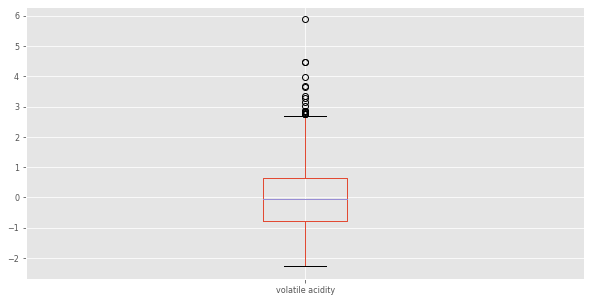

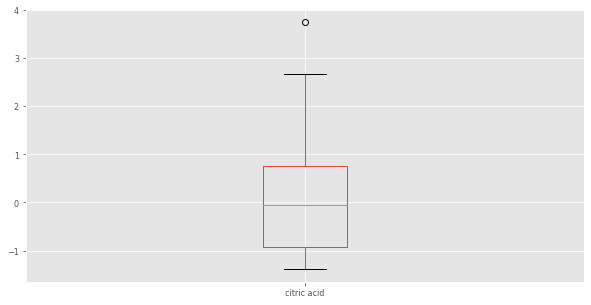

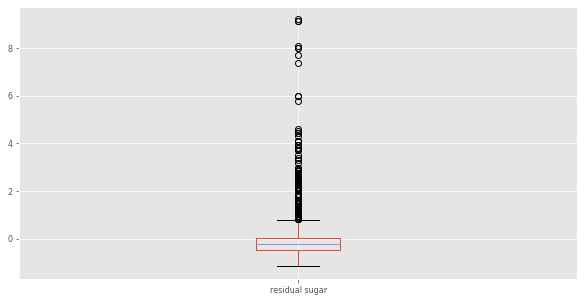

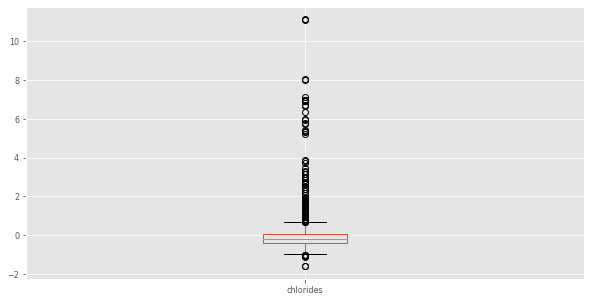

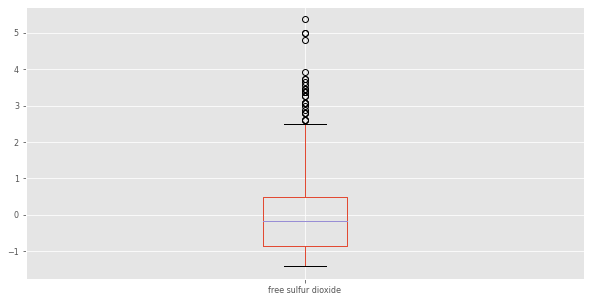

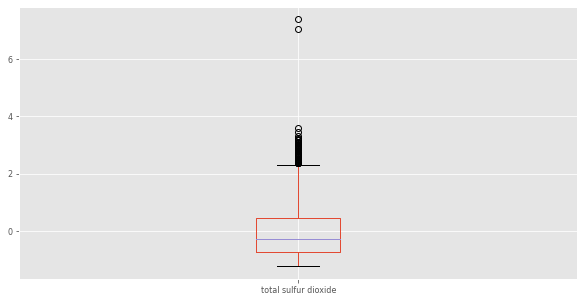

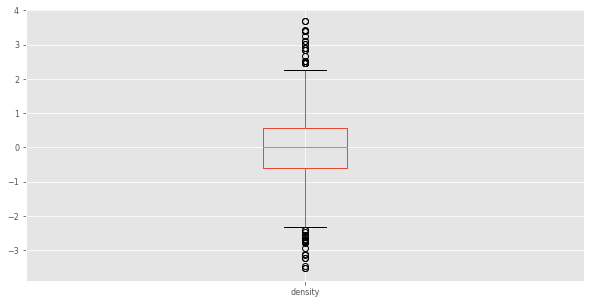

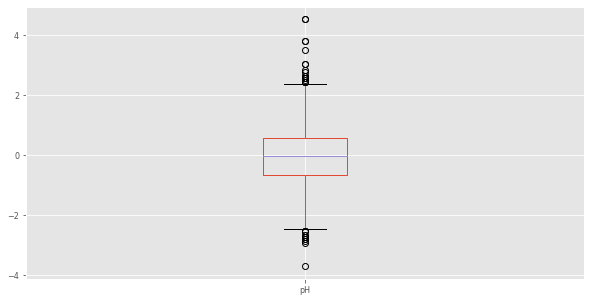

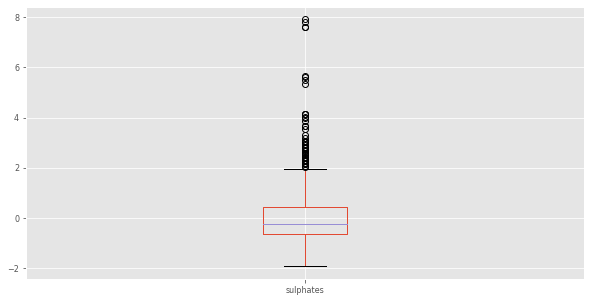

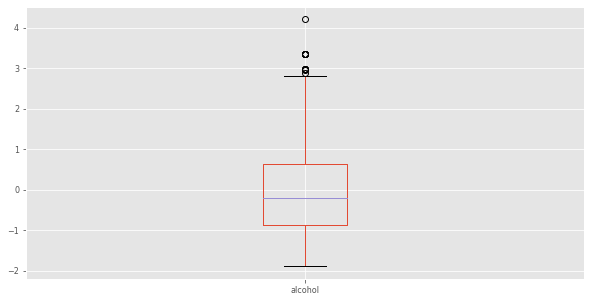

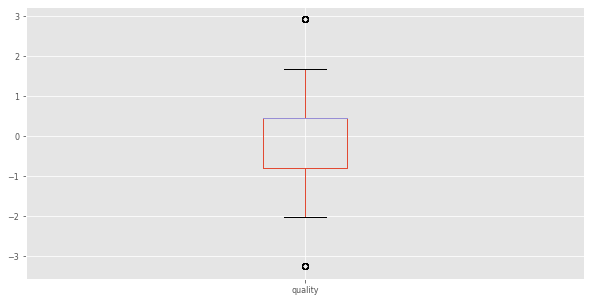

In [74]:
sorted(df)
q1, q3 = np.percentile(df,[25,75])
iqr = q3 - q1

lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)

#print(lower_bound,upper_bound)


cols = df.columns
for i in range(len(cols)):
  fig = plt.figure(figsize = (10,5))
  df.boxplot(cols[i])
###plt.xlabel(" # wine")
#plt.ylabel("ph")
#plt.title("diagrammi delle barre")
#plt.show()

# Feature Selection

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077,0.4
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769,0.6
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000,0.6
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923,0.4


In [ ]:
df_var = normalized_df.var()
df_var
X = normalized_df.iloc[:,:-1]



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [ ]:
train_set = [X_train,y_train]
val_set = [X_val,y_val]
test_set = [X_test,y_test]

In [ ]:
#train_set

In [ ]:
length_X_train = len(X_train)
length_y_train = len(y_train)

print('x =',length_X_train,',y =',length_y_train)

x = 959 ,y = 959


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
var1 = clf.predict(X_train)

In [ ]:
clf.score(X_train,y_train)

0.5776850886339937

In [ ]:
var1 - y_train

array([ 0,  0, -1,  0,  0,  0,  0,  0,  0, -1, -2, -1,  0,  2,  1, -1,  1,
       -1,  0, -1,  0,  0,  1, -1,  0,  0, -1,  0, -1,  0,  0, -1,  0, -1,
        1, -2,  0,  0, -2,  0, -1, -1,  0,  0,  0, -2, -2,  0,  0, -1,  0,
        0,  0,  0, -1,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0, -1,  1,
        0,  0,  0,  1,  0,  0,  0,  1,  0, -1,  0, -1, -1,  0,  0,  0,  1,
        0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0, -2,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  1,  0,  0, -1, -1,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,
        0, -1,  2, -1,  0,  0,  0, -1, -1,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  1, -1,  0,  0,  0,  0,
       -1,  0, -1, -1,  1,  0,  0,  0,  0,  0,  0, -1,  2,  0,  1,  0, -1,
        0, -1,  0,  0,  0,  0,  1, -1,  0,  1,  0,  0, -1,  0, -1, -1,  0,
        0, -1,  0, -1,  0,  1,  0,  0,  0, -1,  1,  1,  0,  2, -1,  0,  0,
       -2,  0,  2,  0, -1